<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [183]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [184]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-06-01 10:46:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-06-01 10:46:33 (13.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [185]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [186]:
df.shape

(346, 10)

### Convert to date time object 

In [187]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [188]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [190]:
#install seaborn
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn


The following packages will be UPDATED:

    openssl:         1.0.2r-h14c3975_0   conda-forge --> 1.0.2s-h7b6447c_0 anaconda

The following packages will be DOWNGRADED:

    ca-certificates: 2019.3.9-hecc5488_0 conda-forge --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1001 conda-forge --> 2018.8.24-py35_1  anaconda

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


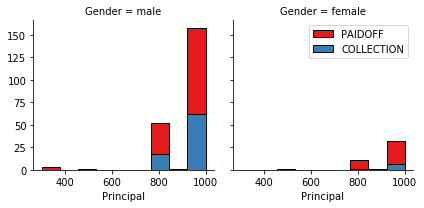

In [191]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

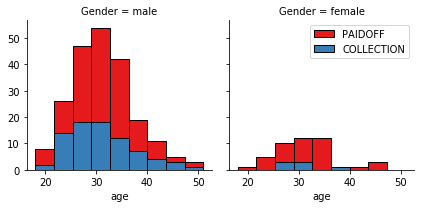

In [192]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

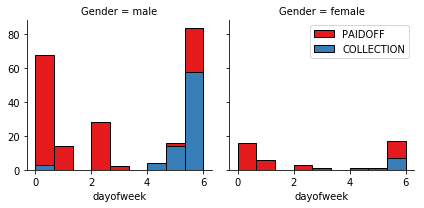

In [193]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [194]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [195]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan


Lets convert male to 0 and female to 1:


In [196]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [197]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [198]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [199]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [200]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our labels?

In [201]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [202]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [203]:
#split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [204]:
#build a model using KNN, suppose k = 4
from sklearn.neighbors import KNeighborsClassifier
k = 4
#train model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
#predict
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [205]:
#training set accuracy evaluation
from sklearn import metrics
print("Training set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#test set accuracy evaluation
print("Test set accuracy:", metrics.accuracy_score(y_test, yhat))

Training set accuracy: 0.81884057971
Test set accuracy: 0.742857142857


In [206]:
#find the best k
Ks = 10
mean_accuracy = np.zeros((Ks-1))
std_accuracy = np.zeros((Ks-1))
ConfusionMx = []

for n in range(1, Ks):
    #train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, yhat)
    std_accuracy[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
print(mean_accuracy)
print("The maximum accuracy is ", max(mean_accuracy), " when k = ", mean_accuracy.argmax()+1)

[ 0.69  0.69  0.7   0.74  0.74  0.74  0.73  0.71  0.71]
The maximum accuracy is  0.742857142857  when k =  4


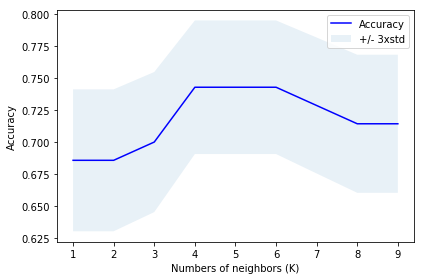

In [207]:
#plot model accuracy for different number of neighbors
plt.plot(range(1, Ks), mean_accuracy, 'b')
plt.fill_between(range(1, Ks), mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Numbers of neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier

#model the decision tree
leTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
leTree.fit(X_train, y_train)

#predict
predTree = leTree.predict(X_test)

In [209]:
#evaluation
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Tree's Accuracy:  0.642857142857


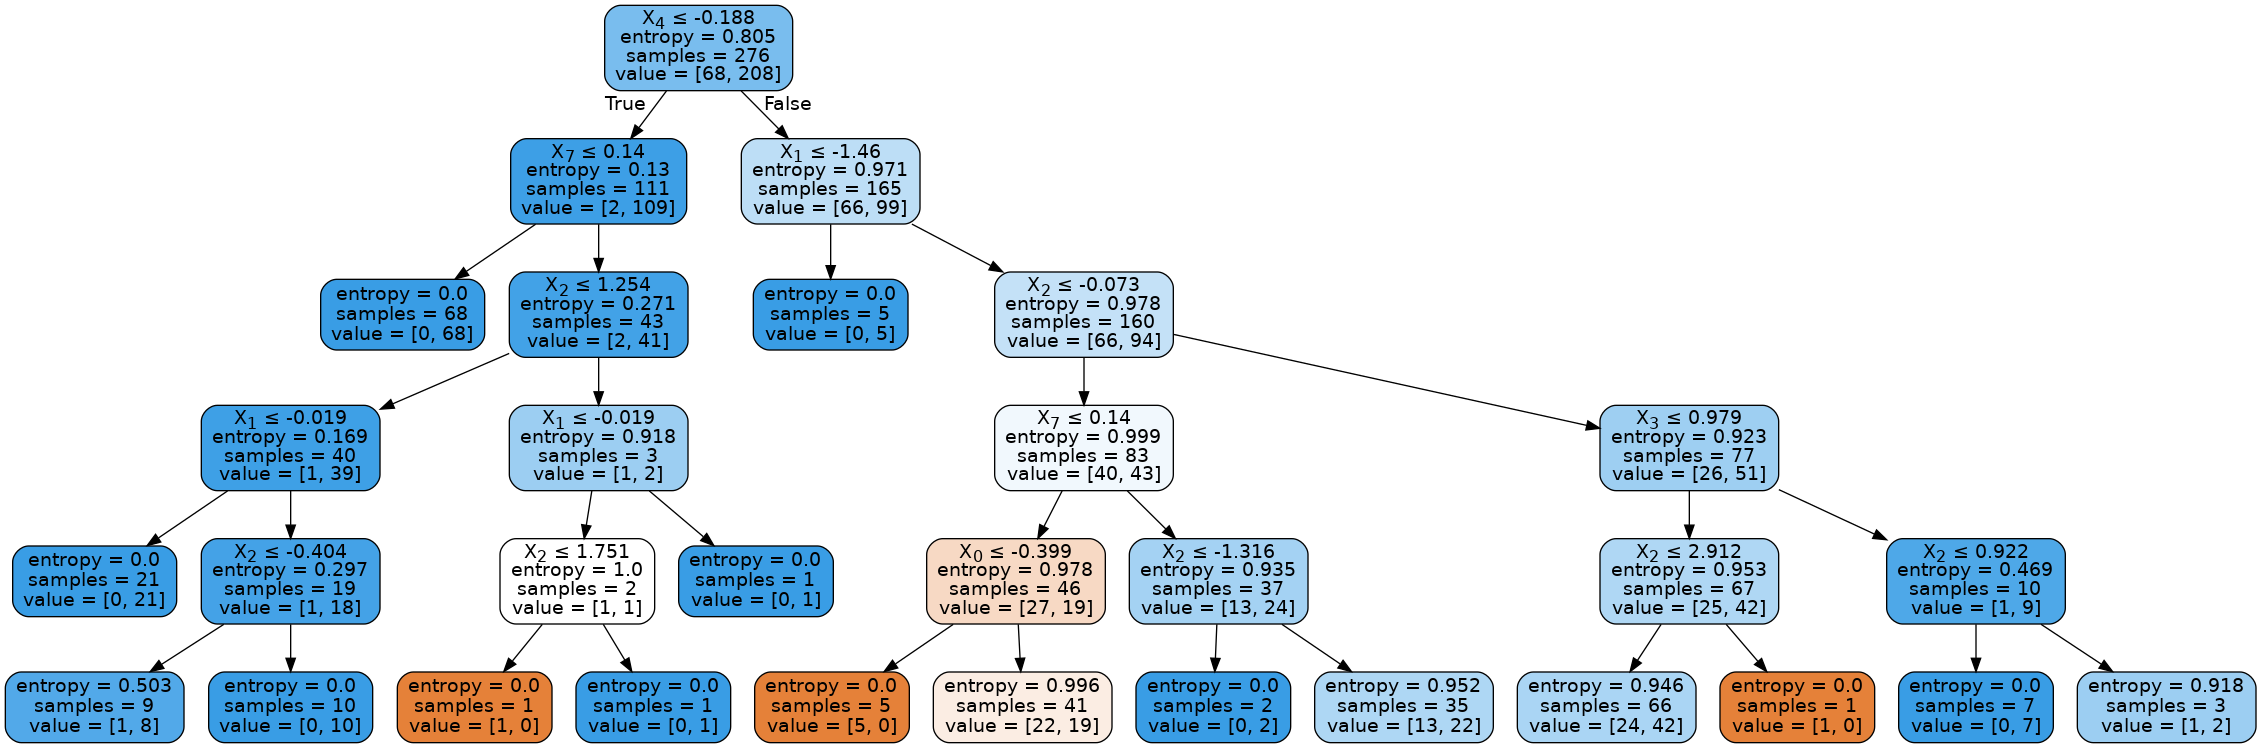

In [210]:
#import libraries for visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

#visualization
dot_data = StringIO()
export_graphviz(leTree, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Support Vector Machine

### Part 1: Use Radial basis function

In [211]:
#load library for model building
from sklearn import svm

#train model
clfRBF = svm.SVC(kernel = 'rbf')
clfRBF.fit(X_train, y_train)

#predict
yhatRBF = clfRBF.predict(X_test)
print(yhatRBF[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION']


             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        18
    PAIDOFF       0.74      0.96      0.83        52

avg / total       0.55      0.71      0.62        70

This is NOT a normalized confusion matrix
[[ 0 18]
 [ 2 50]]


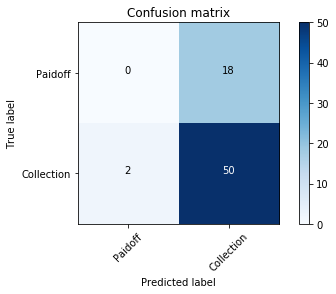

In [212]:
#load libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#confusion matrix function
def plot_confusion_matrix (cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("This is a normalized confusion matrix")
    else:
        print("This is NOT a normalized confusion matrix")
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatRBF)

print(classification_report(y_test, yhatRBF))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Paidoff', 'Collection'], normalize = False, title = 'Confusion matrix')

In [213]:
#evaluation - f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhatRBF, average = 'weighted')

0.61904761904761896

In [214]:
#evaluation - jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhatRBF)

0.7142857142857143

### Part 2: Use linear function

In [215]:
#train model
clfL = svm.SVC(kernel = 'linear')
clfL.fit(X_train, y_train)

#predict
yhatL = clfL.predict(X_test)
print(yhatL[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION']


In [216]:
#evaluation - f1 score
f1_score(y_test, yhatL, average = 'weighted')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.63325526932084308

In [217]:
#evaluation - jaccard index
jaccard_similarity_score(y_test, yhatL)

0.74285714285714288

### Part 3: Use polynomial function

In [218]:
#train model
clfP = svm.SVC(kernel = 'poly')
clfP.fit(X_train, y_train)

#predict
yhatP = clfP.predict(X_test)
print(yhatP[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION']


In [219]:
#evaluation - f1 score
f1_score(y_test, yhatP, average = 'weighted')

0.65714285714285703

In [220]:
#evaluation - jaccard index
jaccard_similarity_score(y_test, yhatP)

0.74285714285714288

### Part 4: Use Sigmoid function

In [221]:
#train model
clfS = svm.SVC(kernel = 'sigmoid')
clfS.fit(X_train, y_train)

#predict
yhatS = clfS.predict(X_test)
print(yhatS[0:10])
print(y_test[0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION']


In [222]:
#evaluation - f1 score
f1_score(y_test, yhatS, average = 'weighted')

0.61904761904761896

In [223]:
#evaluation - jaccard index
jaccard_similarity_score(y_test, yhatS)

0.7142857142857143

**Comment:** Since Polynomial function yields the highest Jaccard index and f1 score, we choose this function for our SVM.

# Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression

#build model
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)

#predict
ypredLR = LR.predict(X_test)
ypredLR[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [231]:
#estimate for the classes
ypredLR_prob = LR.predict_proba(X_test)
ypredLR_prob[0:5]

array([[ 0.29,  0.71],
       [ 0.31,  0.69],
       [ 0.31,  0.69],
       [ 0.48,  0.52],
       [ 0.45,  0.55]])

In [232]:
#Evaluation - jaccard index
jaccard_similarity_score(y_test, ypredLR)

0.74285714285714288

In [243]:
#Evaluation - log loss
from sklearn.metrics import log_loss
log_loss(y_test, ypredLR_prob)

0.55504145564747165

# Apply to the test set

In [237]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [238]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-06-01 11:00:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-06-01 11:00:34 (464 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [239]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [240]:
#Pre-processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#One hot encoding
Feature_list = test_df[['Principal','terms','age','Gender','weekend']]
Feature_list = pd.concat([Feature_list,pd.get_dummies(test_df['education'])], axis=1)
Feature_list.drop(['Master or Above'], axis = 1,inplace=True)

#Feature selection
X_real = Feature_list
y_real = test_df['loan_status'].values
#Normalize data
X_real = preprocessing.StandardScaler().fit(X_real).transform(X_real)

### Part 1: KNN evaluation 


In [242]:
#predict using k = 4
yKNN_hat = neigh.predict(X_real)
#evaluation
print("Jaccard index: ", jaccard_similarity_score(y_real, yKNN_hat))
print("F1-score: ", f1_score(y_real, yKNN_hat, average='weighted'))

Jaccard index:  0.62962962963
F1-score:  0.60758377425


### Part 2: Decision tree evaluation 

In [244]:
#predict 
ytree_hat = leTree.predict(X_real)
#evaluation
print("Jaccard index: ", jaccard_similarity_score(y_real, ytree_hat))
print("F1-score: ", f1_score(y_real, ytree_hat, average='weighted'))

Jaccard index:  0.759259259259
F1-score:  0.740172397461


### Part 3: SVM evaluation

In [245]:
#predict 
yP_hat = clfP.predict(X_real)
#evaluation
print("Jaccard index: ", jaccard_similarity_score(y_real, yP_hat))
print("F1-score: ", f1_score(y_real, yP_hat, average='weighted'))

Jaccard index:  0.759259259259
F1-score:  0.69592281357


### Part 4: Logistic regression evaluation 

In [246]:
#predict 
yLR_hat = LR.predict(X_real)
#predict probability
yLR_hat_prob = LR.predict_proba(X_real)
#evaluation
print("Jaccard index: ", jaccard_similarity_score(y_real, yLR_hat))
print("F1-score: ", f1_score(y_real, yLR_hat, average='weighted'))
print("Log loss: ", log_loss(y_real, yLR_hat_prob))

Jaccard index:  0.740740740741
F1-score:  0.630417651694
Log loss:  0.570486161883


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.62    | 0.60     | NA      |
| Decision Tree      | 0.75    | 0.74     | NA      |
| SVM                | 0.75    | 0.69     | NA      |
| LogisticRegression | 0.74    | 0.63     | 0.57    |